In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, suppress_output=False)

pipeline_dir='/data/bwedig/mejiro/pipeline_dev'


100%|██████████| 1090/1090 [00:20<00:00, 52.46it/s]


Count: 55
('high_z_snrs=[24.500091804902464, 40.38345533180578, 58.86839630554942, '
 '55.06505833673766, 34.32766337160805, 83.4011803081204, 66.5044971151214, '
 '143.65861173150788, 87.0891911592939, 41.38697370701043, 68.87008647673055, '
 '116.03913577898595, 22.94517969527454, 48.85558580171203, '
 '47.005787031628074, 44.659479668503614, 72.12584028394812, '
 '51.94411687886429, 64.76928398242129, 31.50247819523306, 32.957419132305546, '
 '88.44250650832309, 30.423271637694864, 71.34470656359795, 59.39812963003846, '
 '66.00056818783436, 130.63529350919578, 114.37438009827895, '
 '63.786636926054605, 87.35068678202265, 28.86420072565441, '
 '107.08265172744076, 118.81176228508505, 86.06341590080687, '
 '46.100392122304335, 96.24547601523255, 36.59526257868592, 71.38342958242379, '
 '70.53376247653439, 26.113244706541693, 127.39845552755814, '
 '24.41541567391567, 63.492873529927, 20.251628344357567, 42.25824370171566, '
 '49.46437869832895, 96.06027355136514, 32.382221556766105,

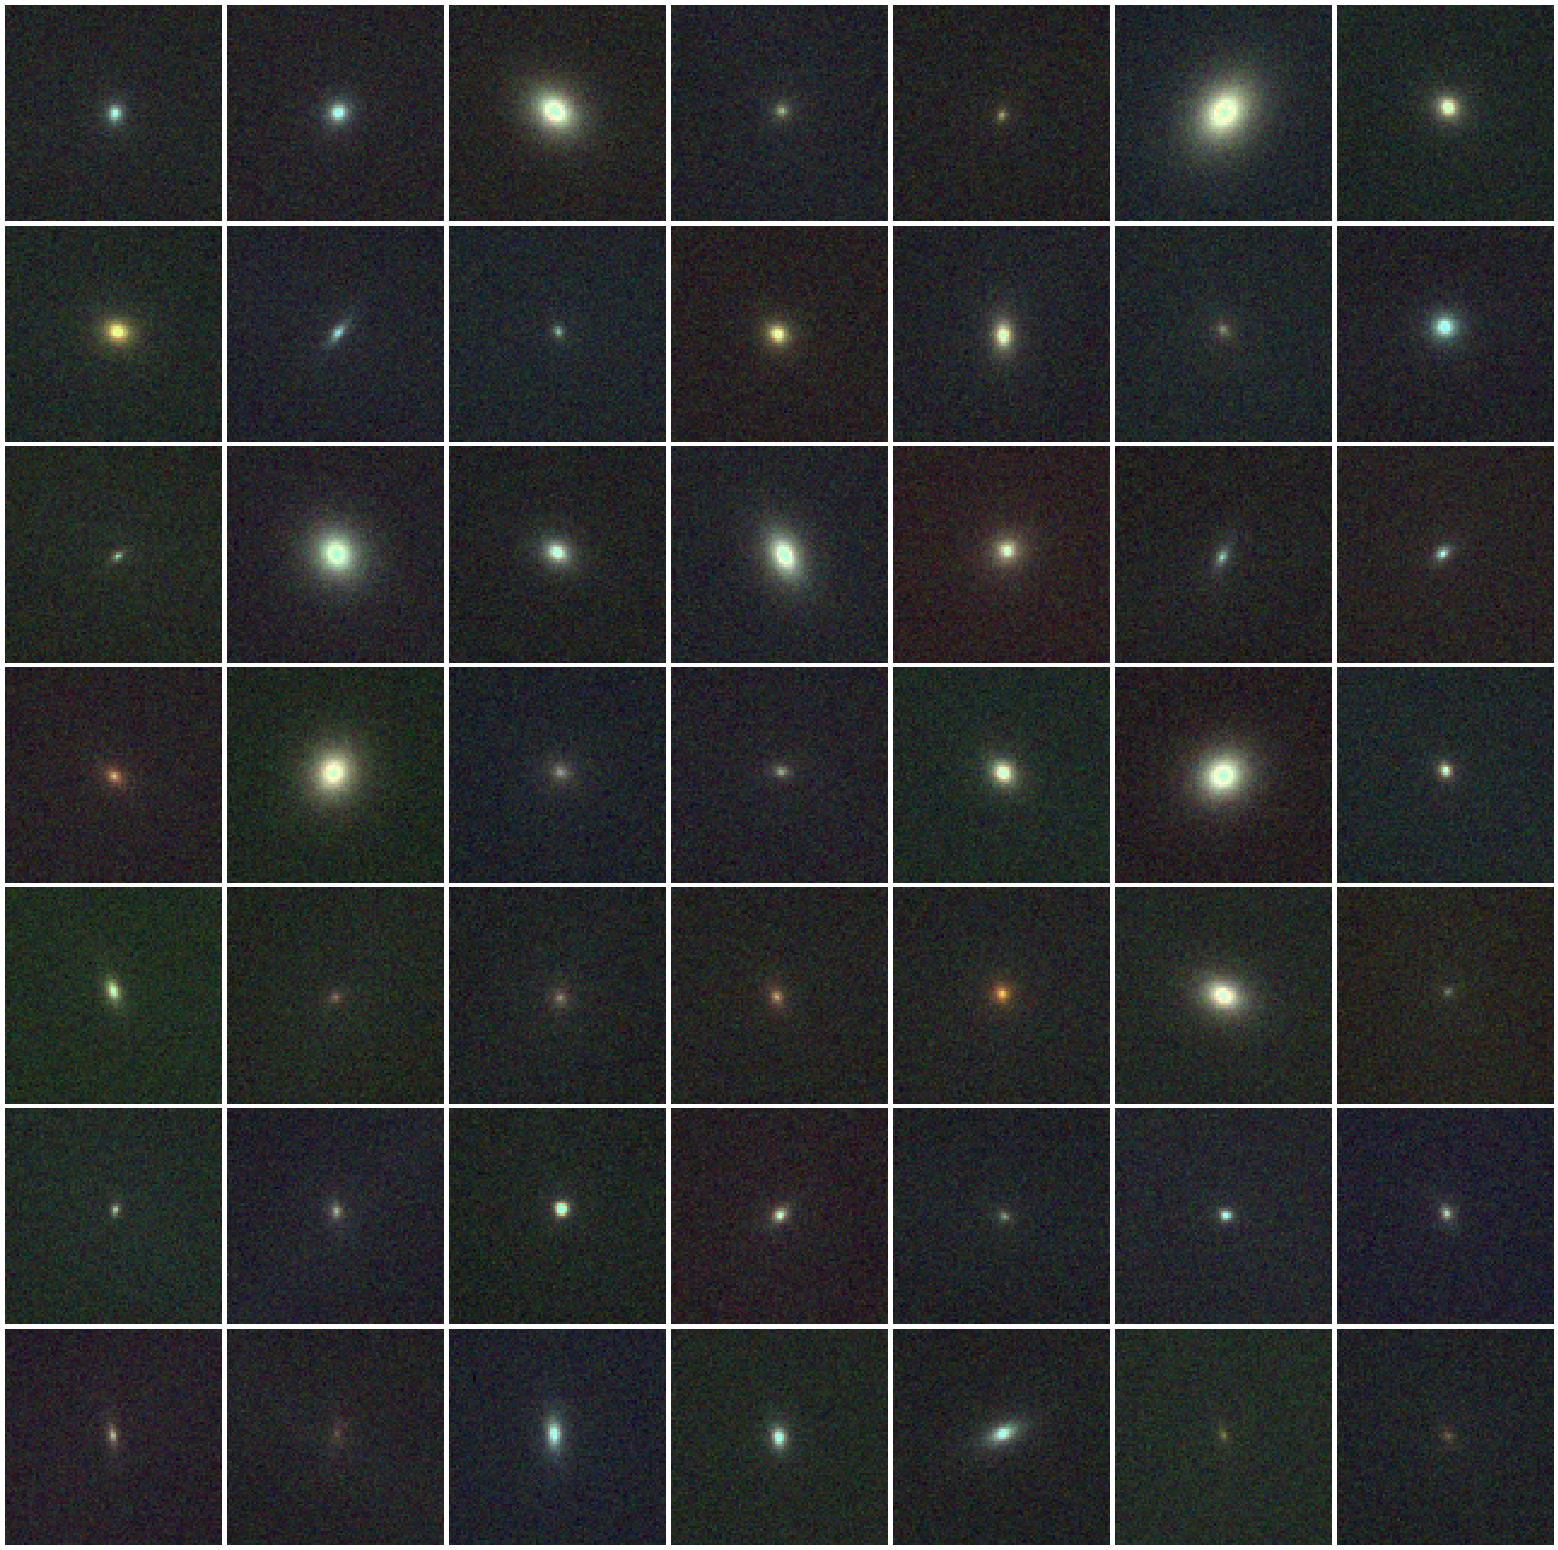

In [6]:
high_z_sources = [l for l in all_lenses if l.z_source > 5]
print(f'Count: {len(high_z_sources)}')

high_z_uids = [l.uid for l in high_z_sources]
high_z_snrs = [l.snr for l in high_z_sources]
pprint(f'{high_z_snrs=}')

high_z_color = [lens_util.get_sample(pipeline_dir, index=uid, model=False)[2] for uid in high_z_uids]

plot.rgb_plot_grid(high_z_color, side=7)

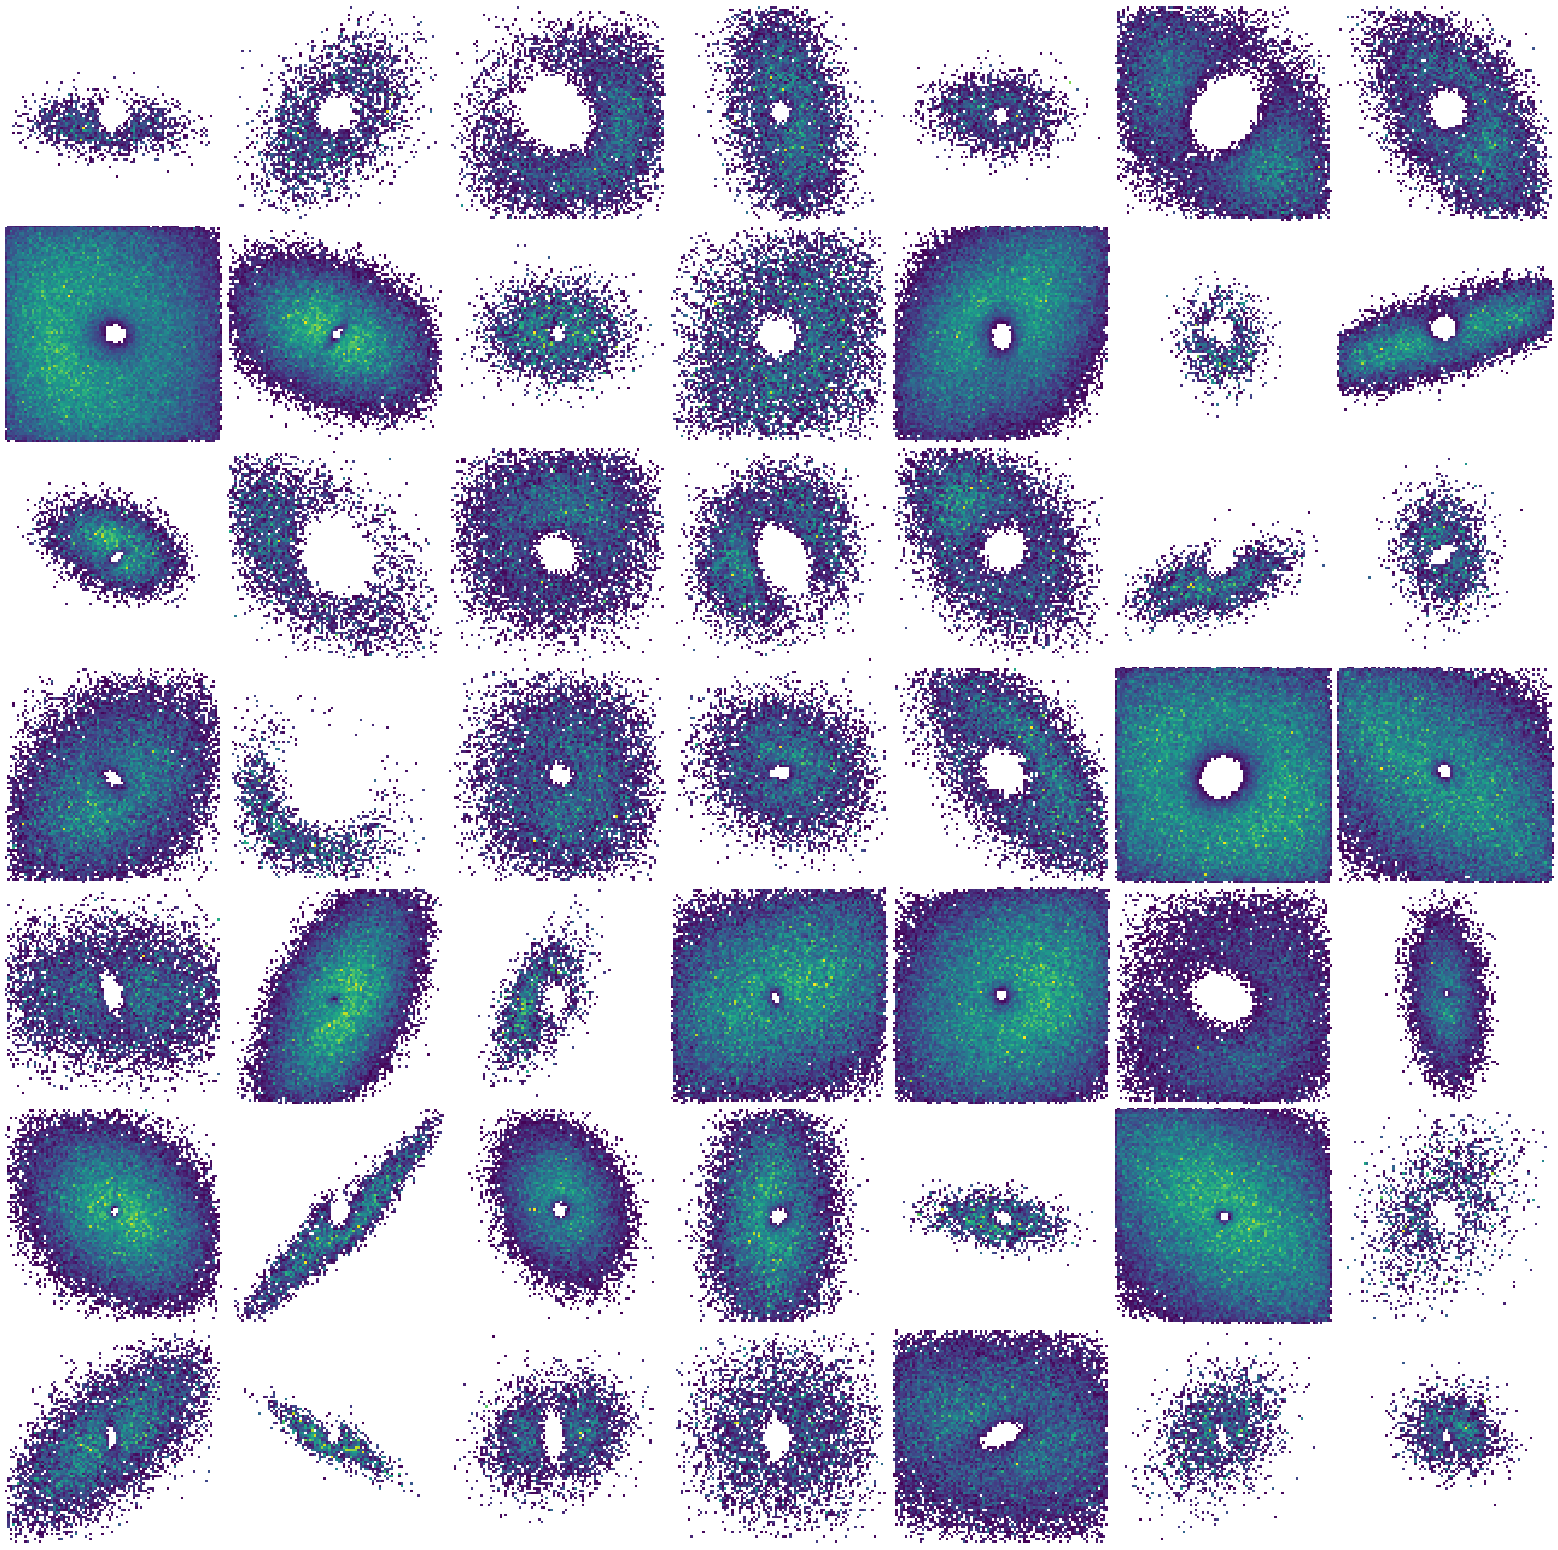

In [7]:
high_z_masked_snr_arrays = [l.masked_snr_array for l in high_z_sources]

plot.rgb_plot_grid(high_z_masked_snr_arrays, side=7)